In [1]:
import numpy as np
from wipy.wipy_utils import utils
from matplotlib import pyplot as plt

(<Figure size 1000x1000 with 2 Axes>, <Axes: >)

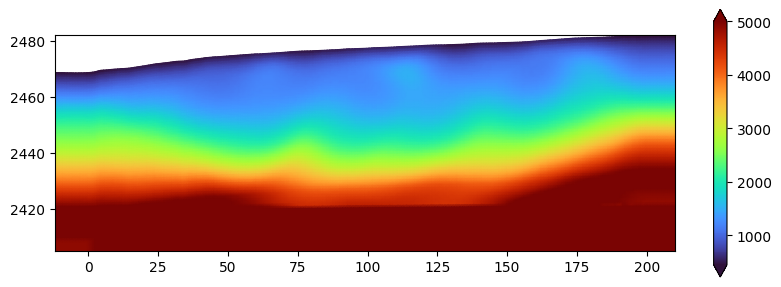

In [2]:
input_path = "model_init"

pars = ["vp", "vs", "rho", "x", "z"]

m = utils.load_model(input_path, pars)

utils.plot_model(m, 25, "vp")

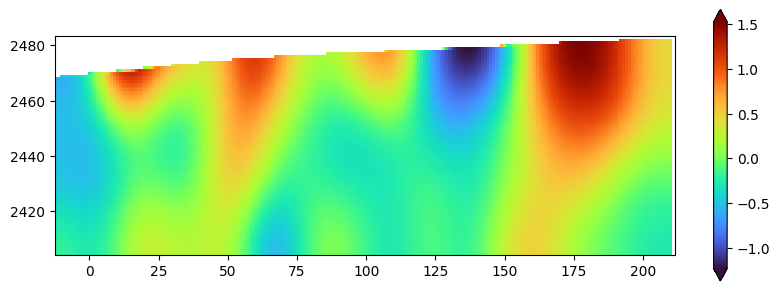

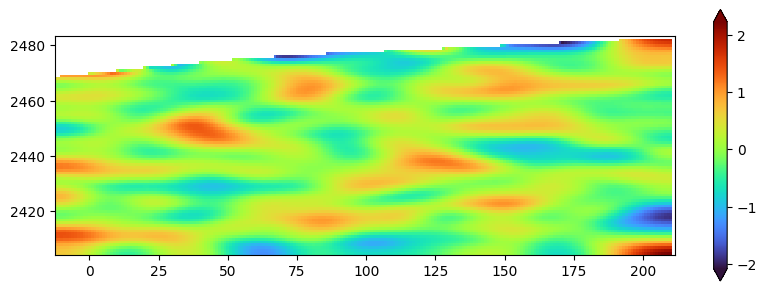

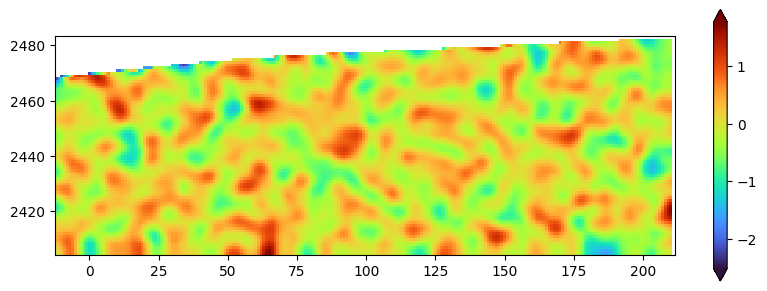

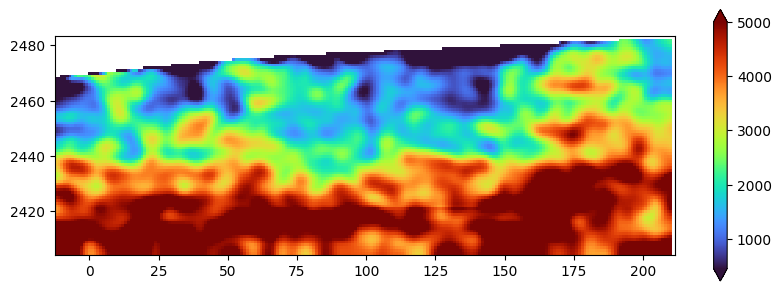

In [3]:
m["pert1"] = 20*np.random.randn(len(m["vp"]))
m["pert1"] = utils.smooth_par(m, "pert1", 10, 20)
utils.plot_model_fast(m, 1, "pert1")
plt.show()

m["pert2"] = 10*np.random.randn(len(m["vp"]))
m["pert2"] = utils.smooth_par(m, "pert2", 10, 2.5)
utils.plot_model_fast(m, 1, "pert2")
plt.show()

m["pert3"] = 5*np.random.randn(len(m["vp"]))
m["pert3"] = utils.smooth_par(m, "pert3", 2.5, 2.5)
utils.plot_model_fast(m, 1, "pert3")
plt.show()

m["vp2"] = m["vp"] + 1000*(m["pert1"] + m["pert2"] + m["pert3"])
utils.plot_model_fast(m, 1, "vp2", bounds=[450, 5000])
plt.show()



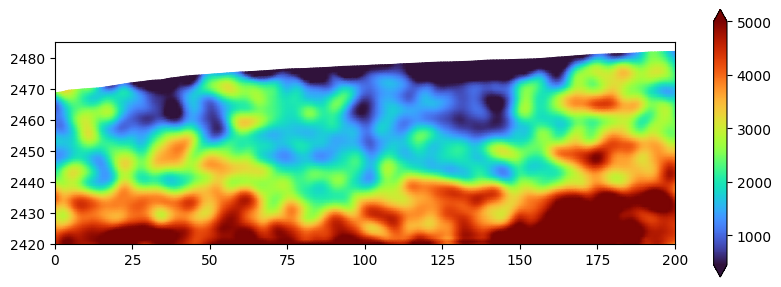

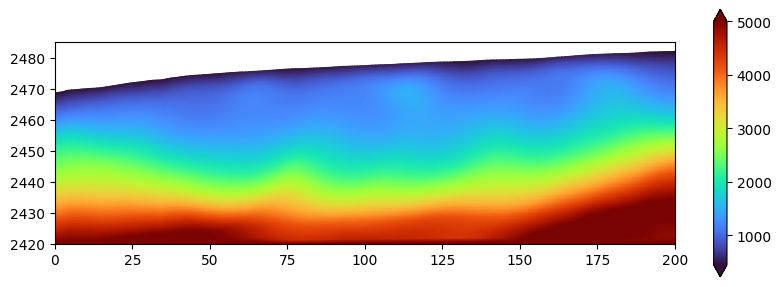

In [4]:
fig1, ax1 = utils.plot_model(m, 25, "vp2", bounds=[450, 5000])
ax1.set_xlim(0, 200)
ax1.set_ylim(2420, 2485)
plt.show()

fig2, ax2 = utils.plot_model(m, 25, "vp", bounds=[450, 5000])
ax2.set_xlim(0, 200)
ax2.set_ylim(2420, 2485)
plt.show()

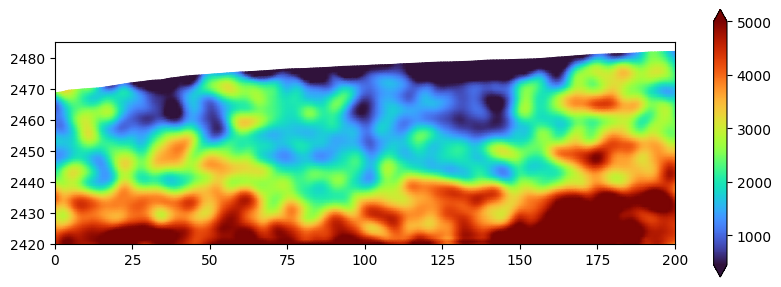

In [7]:
# create a new dicitonary object for the target model

m_target = {"x": m["x"], "z": m["z"], "rho": m["rho"], "vp": m["vp2"]}

#  trim bounds of model

bol1 = m_target["vp"] < 450
m_target["vp"][bol1] = 450

bol2 = m_target["vp"] > 5000
m_target["vp"][bol2] = 5000

# calculate vs

m_target["vs"] = m_target["vp"]/2
bol3 = m_target["vs"] < 250
m_target["vs"][bol3] = 250

# plot model to check work
fig1, ax1 = utils.plot_model(m_target, 25, "vp")
ax1.set_xlim(0, 200)
ax1.set_ylim(2420, 2485)
plt.show()


In [6]:
# write new model

# output_path = "gauss_model"

# utils.write_model(model_path=output_path, model=m_target)